# Hello, MNIST!

In [1]:
import torch
import fastai
from fastai import *
from fastai.vision import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
fastai.__version__

'1.0.29.dev0'

In [3]:
torch.manual_seed(17);
use_gpu = torch.cuda.is_available();use_gpu

True

## Obtendo os dados

In [4]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Normalization
mean = X_train.mean()
std = X_train.std()
X_train = (X_train-mean)/std
X_valid = (X_valid-mean)/std

# Numpy to Torch Tensor

X_train,y_train,X_valid,y_valid = map(torch.tensor, (X_train.astype(np.float32),y_train.astype(np.long),X_valid.astype(np.float32),y_valid.astype(np.long)))

In [6]:
X_train.shape, y_train.min(), y_train.max()

(torch.Size([56000, 784]), tensor(0), tensor(9))

In [7]:
bs=64
train_ds = TensorDataset(X_train, y_train)
valid_ds = TensorDataset(X_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

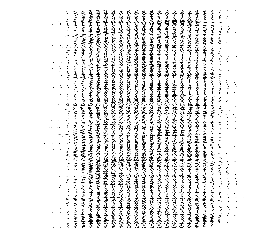

In [8]:
plt.imshow(X_train[:800], cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()

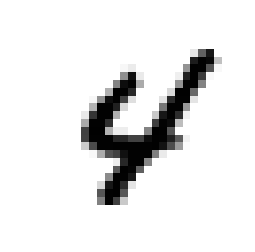

tensor(4)


In [9]:
i = 100
plt.imshow(X_train[i, :].reshape(28, 28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print (y_train[i])

## Criando o modelo

In [10]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(28*28, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
).cuda()

## Função de Perda

In [11]:
loss_func=nn.CrossEntropyLoss()

## Otimizador: Stochastic Gradient Descent (SGD)

In [12]:
lr = 1e-2
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [13]:
def update(x,y,lr):
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr * p.grad)
            p.grad.zero_()
    return loss.item()

In [14]:
losses = [update(x,y,lr) for x,y in data.train_dl]

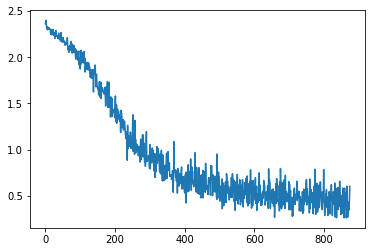

In [15]:
plt.plot(losses)

In [16]:
learn = Learner(data=data, model=model, loss_func=loss_func, metrics=[accuracy])

In [17]:
learn.fit(epochs=10, lr=1e-2)

Total time: 00:28
epoch  train_loss  valid_loss  accuracy
1      0.258577    0.238942    0.928429  (00:02)
2      0.232224    0.253103    0.926857  (00:02)
3      0.228010    0.209510    0.939071  (00:02)
4      0.210804    0.235379    0.935000  (00:02)
5      0.203141    0.226332    0.940214  (00:02)
6      0.203531    0.232411    0.940143  (00:02)
7      0.195709    0.242415    0.933714  (00:02)
8      0.211786    0.216327    0.941929  (00:02)
9      0.189413    0.186680    0.949286  (00:02)
10     0.177739    0.209640    0.943929  (00:02)



In [18]:
net = nn.Sequential(
    nn.Linear(28*28, 500),
    nn.ReLU(),
    nn.Linear(500, 300),
    nn.ReLU(),
    nn.Linear(300, 100),
    nn.ReLU(),
    nn.Linear(100, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
).cuda()

In [19]:
learn = Learner(data=data, model=net, loss_func=loss_func, metrics=[accuracy])

In [20]:
learn.fit_one_cycle(10, 1e-2)

Total time: 00:34
epoch  train_loss  valid_loss  accuracy
1      0.210793    0.202065    0.942929  (00:03)
2      0.201581    0.158427    0.957786  (00:03)
3      0.247223    0.295954    0.931500  (00:03)
4      0.201971    0.229460    0.943286  (00:03)
5      0.167386    0.165112    0.963286  (00:03)
6      0.111749    0.145264    0.970429  (00:03)
7      0.079752    0.142233    0.973214  (00:03)
8      0.050061    0.120662    0.976857  (00:03)
9      0.034403    0.112151    0.980714  (00:03)
10     0.017906    0.125989    0.981286  (00:03)



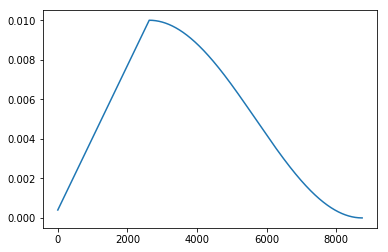

In [21]:
learn.recorder.plot_lr()

Observação:  Se ainda não estiver convencido de que entende como NN funcionam, tente acompanhar o passo a passo em [jcjohnson/pytorch-examples](http://github.com/jcjohnson/pytorch-examples)

# Fim